In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d mylab1/singhan-tea

 40% 6.00M/15.1M [00:00<00:00, 59.1MB/s]
100% 15.1M/15.1M [00:00<00:00, 78.9MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/singhan-tea.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow as tf
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

GPU is available


In [ ]:

from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("/content/drive/MyDrive/tea_disease_detection_model.h5")

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/Tea_Leaf_Disease/Validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = test_set.class_names

Found 300 files belonging to 3 classes.


In [ ]:
y_pred = loaded_model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

300/300 [==============================] - 3s 2ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

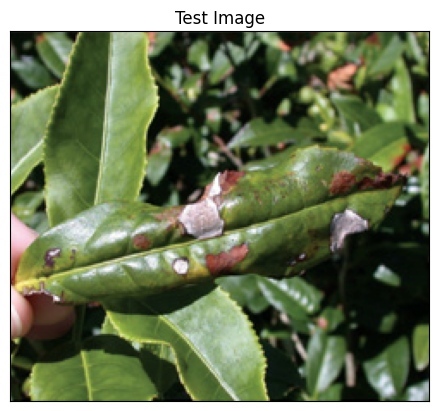

In [ ]:
import cv2
image_path = '/gb.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
import numpy as np
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = loaded_model.predict(input_arr)

1/1 [==============================] - 0s 18ms/step


In [ ]:
result_index = np.argmax(predictions) #Return index of max element


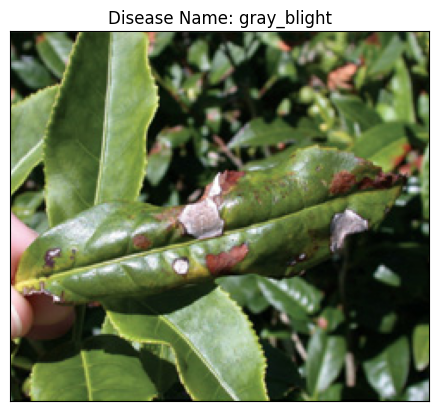

In [ ]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()